<h1>Building an At-Bat Simulator</h1>

Taken from: https://www.baseballdatascience.com/building-an-at-bat-simulator/<br>
Code taken from: https://github.com/micahmelling/baseballdatascience/blob/master/python_scripts/match_up_simulations.py<br>

Includes annotations, modifications, and further comments on usage of functions and advanced analysis of AB simulation. Also inputs different categoriation types and specifics wherever possible. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
def run_match_up_simulation(fastball_surrender_prob, curve_surrender_prob, change_surrender_prob, fastball_hit_prob,
                            curve_hit_prob, change_hit_prob, zero_zero_pitch_probs, zero_zero_hit_surrender_prob,
                            zero_zero_hit_prob, one_zero_pitch_probs, one_zero_hit_surrender_prob, one_zero_hit_prob,
                            zero_one_pitch_probs, zero_one_hit_surrender_prob, zero_one_hit_prob, one_one_pitch_probs,
                            one_one_hit_surrender_prob, one_one_hit_prob, two_zero_pitch_probs,
                            two_zero_hit_surrender_prob, two_zero_hit_prob, zero_two_pitch_probs,
                            zero_two_hit_surrender_prob, zero_two_hit_prob, one_two_pitch_probs,
                            one_two_hit_surrender_prob, one_two_hit_prob, two_one_pitch_probs,
                            two_one_hit_surrender_prob, two_one_hit_prob, three_zero_pitch_probs,
                            three_zero_hit_surrender_prob, three_zero_hit_prob, two_two_pitch_probs,
                            two_two_hit_surrender_prob, two_two_hit_prob, three_one_pitch_probs,
                            three_one_hit_surrender_prob, three_one_hit_prob, three_two_pitch_probs,
                            three_two_hit_surrender_prob, three_two_hit_prob, zero_zero_swing_prob,
                            one_zero_swing_prob, zero_one_swing_prob, one_one_swing_prob,
                            two_zero_swing_prob, zero_two_swing_prob, one_two_swing_prob,
                            two_one_swing_prob, three_zero_swing_prob, two_two_swing_prob,
                            three_one_swing_prob, three_two_swing_prob, swing_produces_out):

    # Runs pitch simulation and determines probability that batter swings or looks at the pitch given
    def run_pitch_simulation(count, count_swing_prob, pitch_probs, count_surrender_prob, fastball_surrender_prob,
                             count_hit_prob, fastball_hit_prob, curve_surrender_prob, curve_hit_prob,
                             change_surrender_prob, change_hit_prob, df):

        # Takes probability of both pitch type and the swing
        # Original pitch choices: fastball, curveball, changeup
        # Added pitch types (to be added): four-seam fastball, splitter
        # Other pitch types (to be added): sinker, two-seam fastball, riser, cutter, side-arm
        
        # Added hit types (if possible): chopper, in-field fly, line drive, deep, home run
        # Add data visualization (if possible) based on when batter successfully hit at what count
        # Always update the number of if statements and pitches' types
        pitch = np.random.choice(a=['fastball', 'curve', 'change', 'four-seam', 'splitter'], p=pitch_probs)
        swing = np.random.choice(a=['yes', 'no'], p=[count_swing_prob, 1 - count_swing_prob])
        # pitch /= pitch.sum(pitch) 


        # If statement for fastball pitched and/or if batter swung and hit the ball
        if pitch == 'fastball':
            hit_prob = (count_surrender_prob + fastball_surrender_prob + count_hit_prob + fastball_hit_prob) / 4
            if swing == 'yes':
                outcome = np.random.choice(a=['hit', 'no_hit'], p=[hit_prob, 1 - hit_prob])
            elif swing == 'no':
                outcome = 'no_hit'
            df = df.append(pd.DataFrame({'count': count, 'pitch': 'fastball', 'swing': swing, 'result': [outcome]}))

        # If statement for curveball pitched and/or if batter swung and hit the ball
        elif pitch == 'curve':
            hit_prob = (count_surrender_prob + curve_surrender_prob + count_hit_prob + curve_hit_prob) / 4
            if swing == 'yes':
                outcome = np.random.choice(a=['hit', 'no_hit'], p=[hit_prob, 1 - hit_prob])
            elif swing == 'no':
                outcome = 'no_hit'
            df = df.append(pd.DataFrame({'count': count, 'pitch': 'curve', 'swing': swing, 'result': [outcome]}))

        # If statement for changeup pitched and/or if batter swung and hit the ball
        elif pitch == 'change':
            hit_prob = (count_surrender_prob + change_surrender_prob + count_hit_prob + change_hit_prob) / 4
            if swing == 'yes':
                outcome = np.random.choice(a=['hit', 'no_hit'], p=[hit_prob, 1 - hit_prob])
            elif swing == 'no':
                outcome = 'no_hit'
            df = df.append(pd.DataFrame({'count': count, 'pitch': 'change', 'swing': swing, 'result': [outcome]}))


        # If statement for four-seam fastball pitched and/or if batter swung and hit the ball
        elif pitch == 'four-seam':
            hit_prob = (count_surrender_prob + change_surrender_prob + count_hit_prob + change_hit_prob) / 4
            if swing == 'yes':
                outcome = np.random.choice(a=['hit', 'no_hit'], p=[hit_prob, 1 - hit_prob])
            elif swing == 'no':
                outcome = 'no_hit'
            df = df.append(pd.DataFrame({'count': count, 'pitch': 'four-seam', 'swing': swing, 'result': [outcome]}))

        # If statement for splitter pitched and/or if batter swung and hit the ball
        elif pitch == 'splitter':
            hit_prob = (count_surrender_prob + change_surrender_prob + count_hit_prob + change_hit_prob) / 4
            if swing == 'yes':
                outcome = np.random.choice(a=['hit', 'no_hit'], p=[hit_prob, 1 - hit_prob])
            elif swing == 'no':
                outcome = 'no_hit'
            df = df.append(pd.DataFrame({'count': count, 'pitch': 'splitter', 'swing': swing, 'result': [outcome]}))

        return df

    at_bat_results = pd.DataFrame()

    # Pitch simulation begins with 0-0 count for the player at bat
    at_bat_results = run_pitch_simulation(count='0-0',
                                          count_swing_prob=zero_zero_swing_prob,
                                          pitch_probs=zero_zero_pitch_probs,
                                          count_surrender_prob=zero_zero_hit_surrender_prob,
                                          fastball_surrender_prob=fastball_surrender_prob,
                                          count_hit_prob=zero_zero_hit_prob,
                                          fastball_hit_prob=fastball_hit_prob,
                                          curve_surrender_prob=curve_surrender_prob,
                                          curve_hit_prob=curve_hit_prob,
                                          change_surrender_prob=change_surrender_prob,
                                          change_hit_prob=change_hit_prob,
                                          df=at_bat_results)

    last_row_df = at_bat_results.tail(1)

    if last_row_df['swing'].any() == 'yes':
        end_of_at_bat = np.random.choice(a=['yes', 'no'], p=[swing_produces_out, 1 - swing_produces_out])
    else:
        end_of_at_bat = 'no'

    if at_bat_results['result'].any() == 'no_hit' and end_of_at_bat == 'no':
        new_count = np.random.choice(a=['0-1', '1-0'], p=[0.50, 0.50])

        if new_count == '0-1':
            at_bat_results = run_pitch_simulation(count='0-1',
                                                  count_swing_prob=zero_one_swing_prob,
                                                  pitch_probs=zero_one_pitch_probs,
                                                  count_surrender_prob=zero_one_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=zero_one_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        elif new_count == '1-0':
            at_bat_results = run_pitch_simulation(count='1-0',
                                                  count_swing_prob=one_zero_swing_prob,
                                                  pitch_probs=one_zero_pitch_probs,
                                                  count_surrender_prob=one_zero_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=one_zero_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        last_row_df = at_bat_results.tail(1)

        if last_row_df['swing'].any() == 'yes':
            end_of_at_bat = np.random.choice(a=['yes', 'no'], p=[swing_produces_out, 1 - swing_produces_out])
        else:
            end_of_at_bat = 'no'

        if last_row_df['result'].any() == 'no_hit' and last_row_df['count'].any() == '1-0' and end_of_at_bat == 'no':
            new_count = np.random.choice(a=['1-1', '2-0'], p=[0.50, 0.50])

        elif last_row_df['result'].any() == 'no_hit' and last_row_df['count'].any() == '0-1':
            new_count = np.random.choice(a=['1-1', '0-2'], p=[0.50, 0.50])

        if new_count == '1-1':
            at_bat_results = run_pitch_simulation(count='1-1',
                                                  count_swing_prob=one_one_swing_prob,
                                                  pitch_probs=one_one_pitch_probs,
                                                  count_surrender_prob=one_one_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=one_one_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        elif new_count == '2-0':
            at_bat_results = run_pitch_simulation(count='2-0',
                                                  count_swing_prob=two_zero_swing_prob,
                                                  pitch_probs=two_zero_pitch_probs,
                                                  count_surrender_prob=two_zero_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=two_zero_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        elif new_count == '0-2':
            at_bat_results = run_pitch_simulation(count='0-2',
                                                  count_swing_prob=zero_two_swing_prob,
                                                  pitch_probs=zero_two_pitch_probs,
                                                  count_surrender_prob=zero_two_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=zero_two_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        last_row_df = at_bat_results.tail(1)

        if last_row_df['swing'].any() == 'yes':
            end_of_at_bat = np.random.choice(a=['yes', 'no'], p=[swing_produces_out, 1 - swing_produces_out])
        else:
            end_of_at_bat = 'no'

        if last_row_df['result'].any() == 'no_hit' and last_row_df['count'].any() == '1-1' and end_of_at_bat == 'no':
            new_count = np.random.choice(a=['1-2', '2-1'], p=[0.50, 0.50])

        elif last_row_df['result'].any() == 'no_hit' and last_row_df['count'].any() == '2-0':
            new_count = np.random.choice(a=['2-1', '3-0'], p=[0.50, 0.50])

        elif last_row_df['result'].any() == 'no_hit' and last_row_df['count'].any() == '0-2':
            new_count = '1-2'

        if new_count == '1-2':
            at_bat_results = run_pitch_simulation(count='1-2',
                                                  count_swing_prob=one_two_swing_prob,
                                                  pitch_probs=one_two_pitch_probs,
                                                  count_surrender_prob=one_two_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=one_two_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        if new_count == '2-1':
            at_bat_results = run_pitch_simulation(count='2-1',
                                                  count_swing_prob=two_one_swing_prob,
                                                  pitch_probs=two_one_pitch_probs,
                                                  count_surrender_prob=two_one_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=two_one_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        if new_count == '3-0':
            at_bat_results = run_pitch_simulation(count='3-0',
                                                  count_swing_prob=three_zero_swing_prob,
                                                  pitch_probs=three_zero_pitch_probs,
                                                  count_surrender_prob=three_zero_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=three_zero_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        last_row_df = at_bat_results.tail(1)

        if last_row_df['swing'].any() == 'yes':
            end_of_at_bat = np.random.choice(a=['yes', 'no'], p=[swing_produces_out, 1 - swing_produces_out])
        else:
            end_of_at_bat = 'no'

        if last_row_df['result'].any() == 'no_hit' and last_row_df['count'].any() == '1-2' and end_of_at_bat == 'no':
            new_count = '2-2'

        elif last_row_df['result'].any() == 'no_hit' and last_row_df['count'].any() == '2-1':
            new_count = np.random.choice(a=['2-2', '3-1'], p=[0.50, 0.50])

        elif last_row_df['result'].any() == 'no_hit' and last_row_df['count'].any() == '3-0':
            new_count = '3-1'

        if new_count == '2-2':
            at_bat_results = run_pitch_simulation(count='2-2',
                                                  count_swing_prob=two_two_swing_prob,
                                                  pitch_probs=two_two_pitch_probs,
                                                  count_surrender_prob=two_two_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=two_two_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        if new_count == '3-1':
            at_bat_results = run_pitch_simulation(count='3-1',
                                                  count_swing_prob=three_one_swing_prob,
                                                  pitch_probs=three_one_pitch_probs,
                                                  count_surrender_prob=three_one_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=three_one_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

        last_row_df = at_bat_results.tail(1)

        if last_row_df['swing'].any() == 'yes':
            end_of_at_bat = np.random.choice(a=['yes', 'no'], p=[swing_produces_out, 1 - swing_produces_out])
        else:
            end_of_at_bat = 'no'

        if last_row_df['result'].any() == 'no_hit' and end_of_at_bat == 'no':
            at_bat_results = run_pitch_simulation(count='3-2',
                                                  count_swing_prob=three_two_swing_prob,
                                                  pitch_probs=three_two_pitch_probs,
                                                  count_surrender_prob=three_two_hit_surrender_prob,
                                                  fastball_surrender_prob=fastball_surrender_prob,
                                                  count_hit_prob=three_two_hit_prob,
                                                  fastball_hit_prob=fastball_hit_prob,
                                                  curve_surrender_prob=curve_surrender_prob,
                                                  curve_hit_prob=curve_hit_prob,
                                                  change_surrender_prob=change_surrender_prob,
                                                  change_hit_prob=change_hit_prob,
                                                  df=at_bat_results)

    return at_bat_results

In [3]:
if __name__ == "__main__":
    # fastball_surrender_prob = 0.240
    # curve_surrender_prob = 0.260
    # change_surrender_prob = 0.250
    
    fastball_surrender_prob = 0.200
    curve_surrender_prob = 0.200
    change_surrender_prob = 0.180
    fourseam_surrender_prob = 0.220
    splitter_surrender_prob = 0.010

    # fastball_hit_prob = 0.300
    # curve_hit_prob = 0.230
    # change_hit_prob = 0.270

    fastball_hit_prob = 0.210
    curve_hit_prob = 0.200
    change_hit_prob = 0.220
    fourseam_hit_prob = 0.170
    splitter_hit_prob = 0.010

    # zero_zero_pitch_probs = [0.60, 0.25, 0.15]
    zero_zero_pitch_probs = [0.50, 0.20, 0.15, 0.10, 0.05]
    zero_zero_hit_surrender_prob = 0.250
    zero_zero_hit_prob = 0.260
    zero_zero_swing_prob = 0.250

    # one_zero_pitch_probs = [0.65, 0.20, 0.15]
    one_zero_pitch_probs = [0.45, 0.20, 0.15, 0.15, 0.05]
    one_zero_hit_surrender_prob = 0.255
    one_zero_hit_prob = 0.265
    one_zero_swing_prob = 0.40

    # zero_one_pitch_probs = [0.55, 0.25, 0.20]
    zero_one_pitch_probs = [0.50, 0.20, 0.15, 0.10, 0.05]
    zero_one_hit_surrender_prob = 0.245
    zero_one_hit_prob = 0.255
    zero_one_swing_prob = 0.450

    # one_one_pitch_probs = [0.60, 0.20, 0.20]
    one_one_pitch_probs = [0.60, 0.20, 0.10, 0.09, 0.01]
    one_one_hit_surrender_prob = 0.250
    one_one_hit_prob = 0.260
    one_one_swing_prob = 0.50

    two_zero_pitch_probs = [0.75, 0.10, 0.05, 0.05, 0.05]
    two_zero_hit_surrender_prob = 0.275
    two_zero_hit_prob = 0.285
    two_zero_swing_prob = 0.40

    zero_two_pitch_probs = [0.45, 0.25, 0.15, 0.10, 0.05]
    zero_two_hit_surrender_prob = 0.205
    zero_two_hit_prob = 0.220
    zero_two_swing_prob = 0.50

    one_two_pitch_probs = [0.55, 0.20, 0.20, 0.05, 0]
    one_two_hit_surrender_prob = 0.215
    one_two_hit_prob = 0.230
    one_two_swing_prob = 0.60

    two_one_pitch_probs = [0.65, 0.20, 0.10, 0.05, 0]
    two_one_hit_surrender_prob = 0.270
    two_one_hit_prob = 0.280
    two_one_swing_prob = 0.60

    three_zero_pitch_probs = [0.85, 0.05, 0.05, 0.05, 0]
    three_zero_hit_surrender_prob = 0.275
    three_zero_hit_prob = 0.285
    three_zero_swing_prob = 0.10

    two_two_pitch_probs = [0.65, 0.20, 0.10, 0.05, 0]
    two_two_hit_surrender_prob = 0.230
    two_two_hit_prob = 0.245
    two_two_swing_prob = 0.65

    three_one_pitch_probs = [0.75, 0.15, 0.05, 0.05, 0]
    three_one_hit_surrender_prob = 0.275
    three_one_hit_prob = 0.285
    three_one_swing_prob = 0.55

    three_two_pitch_probs = [0.70, 0.15, 0.10, 0.05, 0]
    three_two_hit_surrender_prob = 0.260
    three_two_hit_prob = 0.265
    three_two_swing_prob = 0.75

    # swing_produces_out = 0.80
    swing_produces_out = 0.791

    at_bat_results = pd.DataFrame()

    simulation_runs = 100
    counter = 0

    while counter < simulation_runs:
        temp_df = run_match_up_simulation(fastball_surrender_prob, curve_surrender_prob, change_surrender_prob,
                                          fastball_hit_prob, curve_hit_prob, change_hit_prob, zero_zero_pitch_probs,
                                          zero_zero_hit_surrender_prob, zero_zero_hit_prob, one_zero_pitch_probs,
                                          one_zero_hit_surrender_prob, one_zero_hit_prob, zero_one_pitch_probs,
                                          zero_one_hit_surrender_prob, zero_one_hit_prob, one_one_pitch_probs,
                                          one_one_hit_surrender_prob, one_one_hit_prob, two_zero_pitch_probs,
                                          two_zero_hit_surrender_prob, two_zero_hit_prob, zero_two_pitch_probs,
                                          zero_two_hit_surrender_prob, zero_two_hit_prob, one_two_pitch_probs,
                                          one_two_hit_surrender_prob, one_two_hit_prob, two_one_pitch_probs,
                                          two_one_hit_surrender_prob, two_one_hit_prob, three_zero_pitch_probs,
                                          three_zero_hit_surrender_prob, three_zero_hit_prob, two_two_pitch_probs,
                                          two_two_hit_surrender_prob, two_two_hit_prob, three_one_pitch_probs,
                                          three_one_hit_surrender_prob, three_one_hit_prob, three_two_pitch_probs,
                                          three_two_hit_surrender_prob, three_two_hit_prob, zero_zero_swing_prob,
                                          one_zero_swing_prob, zero_one_swing_prob, one_one_swing_prob,
                                          two_zero_swing_prob, zero_two_swing_prob, one_two_swing_prob,
                                          two_one_swing_prob, three_zero_swing_prob, two_two_swing_prob,
                                          three_one_swing_prob, three_two_swing_prob, swing_produces_out)

        at_bat_results = at_bat_results.append(temp_df)
        counter += 1

    at_bat_results.to_csv('simulation_results.csv', index=False)

In [4]:
# at_bat_results.tail()
at_bat_results.head()

,count,pitch,swing,result
0,0-0,curve,no,no_hit
0,0-0,fastball,yes,no_hit
0,0-0,curve,no,no_hit
0,0-0,fastball,yes,hit
0,0-0,fastball,no,no_hit


In [8]:
import matplotlib.pyplot as plt

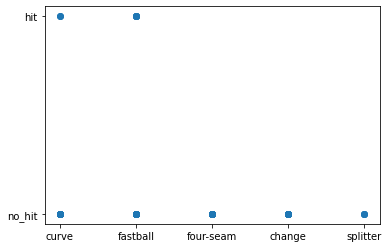

In [10]:
plt.scatter(at_bat_results.pitch, at_bat_results.result)
plt.show()